# `pandas playbook`: working with dates and time series 

<p>
Mal Minhas, v1.1<br>
21.01.24
</p>

<p>
<h4>Versions</h4>
<ul>
<li><b>v1.0</b>: 05.12.21. First version</li>
<li><b>v1.1</b>: 21.01.24. Updated for Python 3.12</li>
</ul>
</p>


This playbook explores how to work with date and time information using `pandas`.  The material is based on the contents of [this video](https://www.youtube.com/watch?v=UFuo7EHI8zc).

## 1. Loading the data

We are using the ETH_1h.csv file contained in the repository.  Let's load it: 

In [1]:
import pandas as pd

df = pd.read_csv('ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Let's check how many rows of data we have and what the types of the seven columns are:

In [2]:
df.shape

(23674, 7)

In [3]:
df.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2. Converting the `Date` column to `datetime` format

The `Date` column is a string and not in datetime format because `pandas` couldn't parse it.  We can check this by checking the `Date` value for the first row as follows:

In [4]:
first = df.loc[0, 'Date']
print(f"first value='{first}' of type {type(first)}")

first value='2020-03-13 08-PM' of type <class 'str'>


### 2.1 Converting `Date` to `datetime` post-hoc

To convert it to `datetime` you can try forcing `pandas` as follows but this won't work because `pandas` can't parse the format:

Instead you need to pass in a format that fits the data as follows:

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

Now let's check the `Date` column:

In [6]:
df.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [7]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

### 2.2 Converting `Date` to `datetime` at load time

You can also do this at the point of loading the data in the first place:

In [8]:
import datetime

#d_parser = lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %I-%p')
#df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_format=d_parser)

df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p')

Let's check that works:

In [9]:
df.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

Since it is now in `datetime` format you can run functions on it like follows:

In [10]:
df.loc[0, 'Date'].day_name()

'Friday'

## 3. `Date` column operations

### 3.1 Day of Week

To access the whole `Date` series you need to use the `dt` class:

In [11]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

Use this to create a new column called `DayOfWeek`:

In [12]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [13]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


### 3.2 Viewing earliest and latest dates

We can use `max` and `min` to get the biggest and smallest value:

In [14]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [15]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

The time delta is thus:

In [16]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

## 4. Date Filters

Get data for 2020 using a filter:

In [17]:
filt = (df.Date >= '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


Get data for 2019:

In [18]:
filt = (df.Date >= '2019') & (df.Date < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


Or we could get data between an arbitrary set of dates:

In [19]:
filt = (df.Date >= pd.to_datetime('2019-01-01')) & (df.Date < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


Let's find the highest values on New Years Day 2020:

In [20]:
filt = (df.Date >= pd.to_datetime('2020-01-01')) & (df.Date < pd.to_datetime('2020-01-02'))
df.loc[filt]['High'].max()

132.68

## 5. Date Slicing

You can do the same thing without a filter by using `set_index`

In [21]:
df.set_index('Date', inplace=True)

In [22]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


You can also now use slicing.  This will get you all the data between Jan and Feb 2020.  Note that attempting `df['2020-01':'2020-02']` will give this error:
> KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [23]:
df.sort_index().loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-01-01 00:00:00,ETHUSD,128.54,128.54,128.12,128.34,245119.91,Wednesday
2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
...,...,...,...,...,...,...,...
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday


This means we can run operations on the corresponding subset.  Like this one which finds the mean closing price for all rows in January 2020:

In [24]:
df.sort_index().loc['2020-01':'2020-02']['Close'].mean()

195.1655902777778

Let's look at the high values for the day on New Years Day 2020 - use `loc` otherwise you get a deprecation warning.  Note this correlates with the value calculated using a filter in the previous section:

In [25]:
df.loc['2020-01-01']['High'].max()

132.68

## 6. Resampling

Currently the data is broken down by date and hour.  What if we want it to be per **day**?  The following will pull out the `max` value from `High` to give us a series of the highest values per day: 

In [26]:
df.High.resample('D').max()

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

Let's check that the value for New Years Day 2020 is indeed the right one we found in the previous section:

In [27]:
highs = df.High.resample('D').max()
assert(highs['2020-01-01'] == df.loc['2020-01-01']['High'].max())

Let's check the type of `highs`:

In [28]:
type(highs)

pandas.core.series.Series

The formulation of `highs` is useful because it allows us to plot the high values by day rather than by hour:

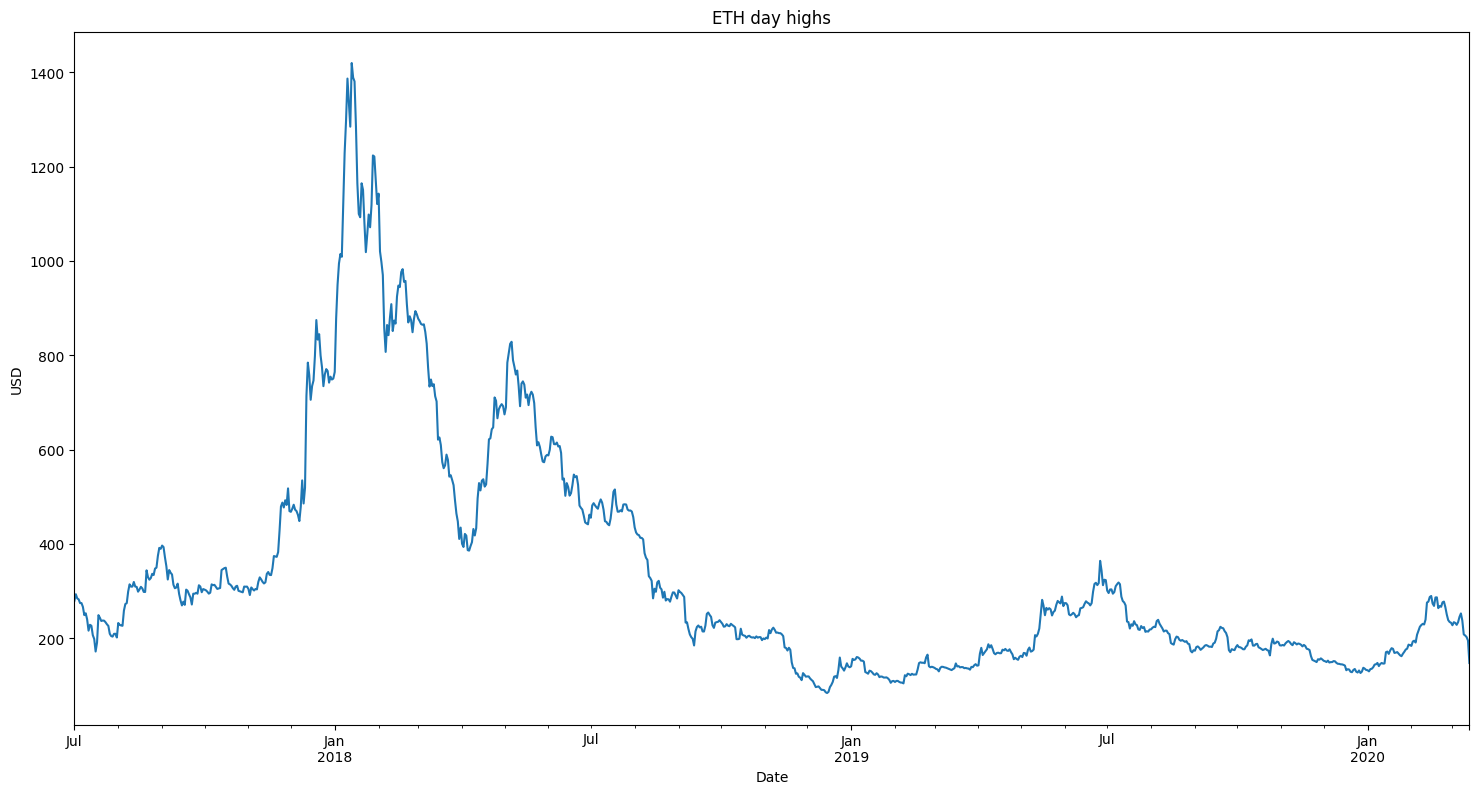

In [29]:
_ = highs.plot(figsize=(18,9)).set(xlabel='Date', ylabel='USD', title=f"ETH day highs")

Resampling with multiple columns over the whole dataframe using different methods using `agg`:

In [30]:
df.resample('W').agg({'Close':'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


We can plot `Volume`,`High` and `Close` time series value with twin y axes as follows:

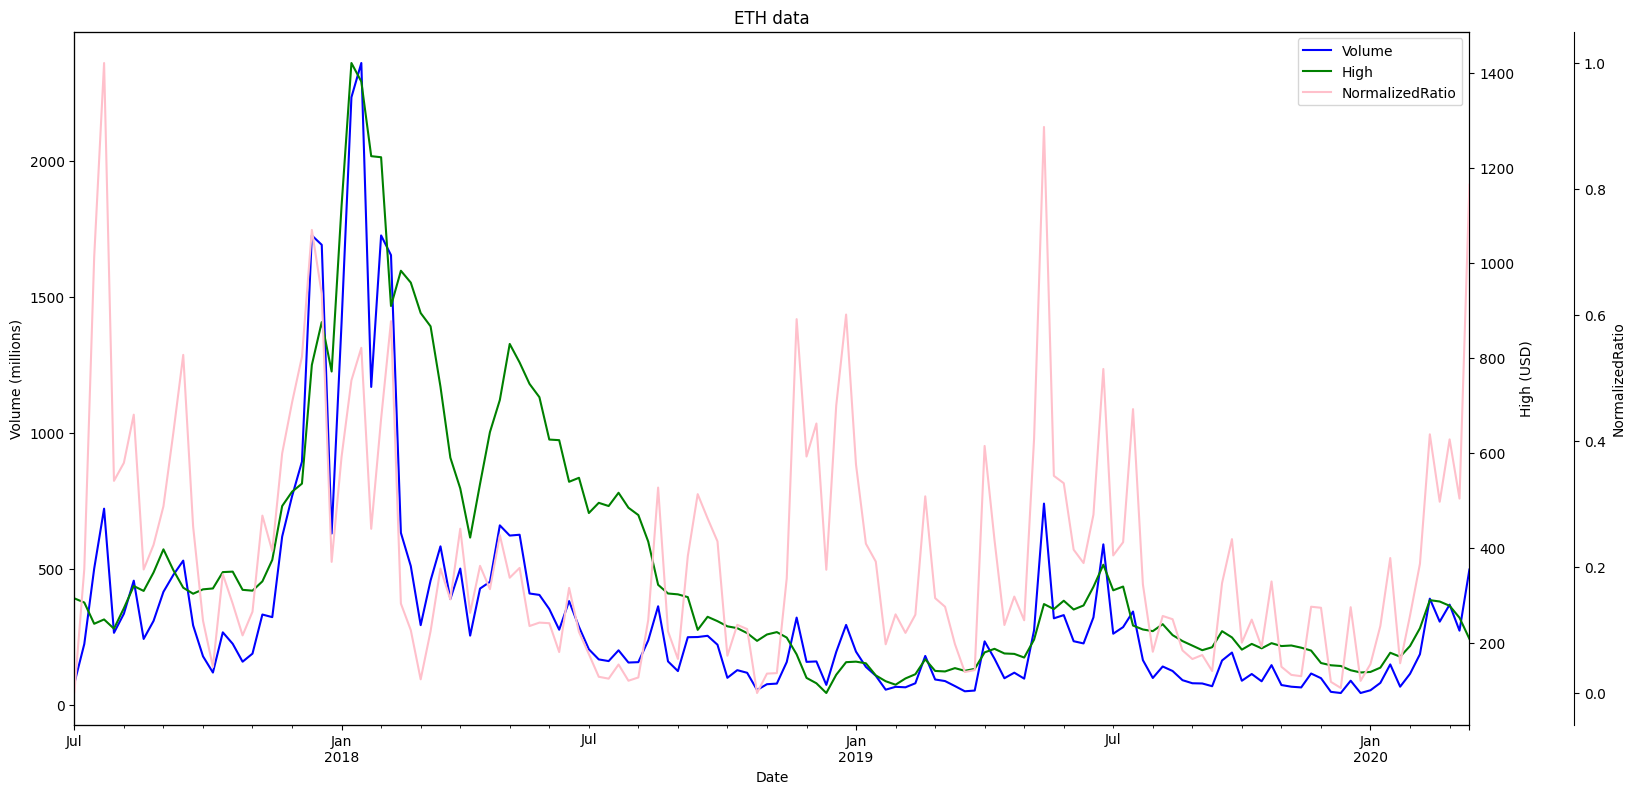

In [31]:
triple_axes = True
df1 = df.resample('W').agg({'Close':'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})
# 1. Normalize the ratio between Volume and High values per day
df1['Ratio'] = (df1.Volume/df1.High)
df1['NormalizedRatio']=(df1.Ratio-df1.Ratio.min())/(df1.Ratio.max() - df1.Ratio.min())
#print(df1.head(10))
# 2. set the left-hand side axis to Volume
ax1 = df1.Volume.plot(figsize=(18,9), color='blue', xlabel='Date', ylabel='Volume (millions)', title=f"ETH data")
# 3. reformat the left-hand y axis ticks
import matplotlib.ticker as mticker
def reformat(v):
    return int(v / 1000000)
ticks_loc = ax1.get_yticks().tolist()
ax1.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_yticklabels([reformat(x) for x in ticks_loc])
# 4. offer two ways to draw the right hand side axes depending on whether we want two (Volume,High+Close) or three (Volume,High,Ratio) y axes
lines, labels = ax1.get_legend_handles_labels()
def updateLabels(ax,lines,labels):
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
if triple_axes:
    ax2 = ax1.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))
    df1.High.plot(ax=ax2, ylabel='High (USD)', color='green')
    updateLabels(ax2,lines,labels)
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.075))
    df1.NormalizedRatio.plot(ax=ax3, label='NormalizedRatio', color='pink')
    ax3.set_ylabel(ylabel='NormalizedRatio')
    updateLabels(ax3,lines,labels)
else:
    ax2 = ax1.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))
    df1.High.plot(ax=ax2, ylabel='USD', color='green')
    df1.Close.plot(ax=ax2, color='pink')
    updateLabels(ax2,lines,labels)
# 5. fix up the legend
_ = ax1.legend(lines, labels, loc=0)